In [65]:
# Import libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn import datasets
from sklearn import neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Make predictions using SKLearn

In [55]:
# Load digits dataset
load_dataset = datasets.load_digits()
dataset = load_dataset.data
target_names = load_dataset.target_names

In [56]:
# Split train and test dataset
train_data, test_data, train_label, test_label = train_test_split(dataset, load_dataset.target, test_size=0.2)
train_data.shape

(1437, 64)

In [57]:
# Create model
model = neural_network.MLPClassifier()
model.fit(train_data, train_label)

MLPClassifier()

In [58]:
# Make predictions on test data
prediction = model.predict(test_data)

for i in range(5):
    print("Prediction: {} Actual: {}".format(prediction[i], test_label[i]))

Prediction: 3 Actual: 3
Prediction: 8 Actual: 8
Prediction: 6 Actual: 6
Prediction: 7 Actual: 7
Prediction: 1 Actual: 1


In [12]:
# Calculate accuracy score
accuracy_score(test_label, prediction) * 100

97.77777777777777

# Make predictions using Tensorflow

In [59]:
# Load digits dataset from keras datasets
loaded_dataset = keras.datasets.mnist.load_data()
data = load_dataset.data
target = load_dataset.target
data.shape

(1797, 64)

In [60]:
# Split data to train and test sets
train_data = data[:1200]
test_data = data[1200:]

train_targets = target[:1200]
test_targets = target[1200:]

In [61]:
# Create and compile model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(len(load_dataset.feature_names),)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Train model
history = model.fit(train_data, train_targets, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
30/30 - 0s - loss: 4.5059 - accuracy: 0.2094 - val_loss: 2.5570 - val_accuracy: 0.3375
Epoch 2/10
30/30 - 0s - loss: 1.4725 - accuracy: 0.5625 - val_loss: 1.2525 - val_accuracy: 0.5917
Epoch 3/10
30/30 - 0s - loss: 0.7214 - accuracy: 0.7719 - val_loss: 0.8297 - val_accuracy: 0.7000
Epoch 4/10
30/30 - 0s - loss: 0.4478 - accuracy: 0.8510 - val_loss: 0.5644 - val_accuracy: 0.8083
Epoch 5/10
30/30 - 0s - loss: 0.3192 - accuracy: 0.8979 - val_loss: 0.4710 - val_accuracy: 0.8542
Epoch 6/10
30/30 - 0s - loss: 0.2370 - accuracy: 0.9240 - val_loss: 0.3999 - val_accuracy: 0.8500
Epoch 7/10
30/30 - 0s - loss: 0.1822 - accuracy: 0.9458 - val_loss: 0.3727 - val_accuracy: 0.8708
Epoch 8/10
30/30 - 0s - loss: 0.1477 - accuracy: 0.9615 - val_loss: 0.3435 - val_accuracy: 0.8833
Epoch 9/10
30/30 - 0s - loss: 0.1221 - accuracy: 0.9646 - val_loss: 0.3090 - val_accuracy: 0.8917
Epoch 10/10
30/30 - 0s - loss: 0.1056 - accuracy: 0.9708 - val_loss: 0.3047 - val_accuracy: 0.8833


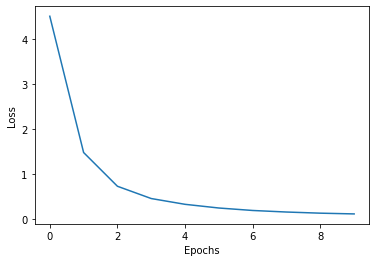

In [77]:
# Plot loss curve
plt.figure()
plt.plot(history.epoch, history.history['loss'], label='Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [64]:
# Make predictions on test data
prediction = model.predict(test_data)

for i in range(5):
    print("Prediction: {} Actual: {}".format(np.argmax(prediction[i]), test_targets[i]))

Prediction: 7 Actual: 7
Prediction: 7 Actual: 7
Prediction: 3 Actual: 3
Prediction: 5 Actual: 5
Prediction: 1 Actual: 1


In [69]:
# Check models accuracy
loss, accuracy = model.evaluate(test_data, test_targets)
print(accuracy)

19/19 [==============================] - 0s 975us/step - loss: 0.4356 - accuracy: 0.8827
0.8827470541000366
